<a href="https://colab.research.google.com/github/evakorsunova/evakorsunova-DataScience-GenAI-Final-Submissions/blob/main/Personal/Tensorflow_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Project

I'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
upload = files.upload()

Saving bank_note_data.xls to bank_note_data.xls


In [ ]:
data = pd.read_csv('bank_note_data.xls')

In [ ]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Class', ylabel='count'>

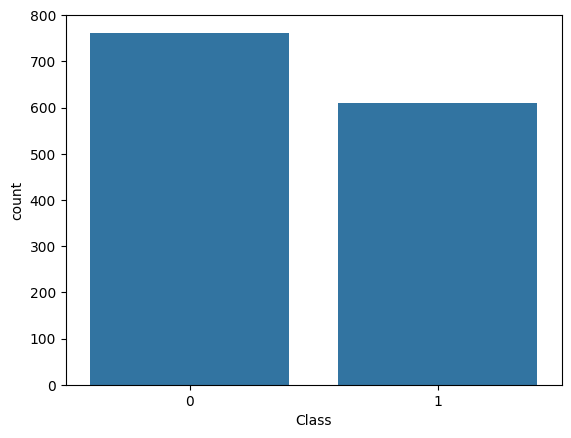

In [ ]:
sns.countplot(x='Class',data=data)

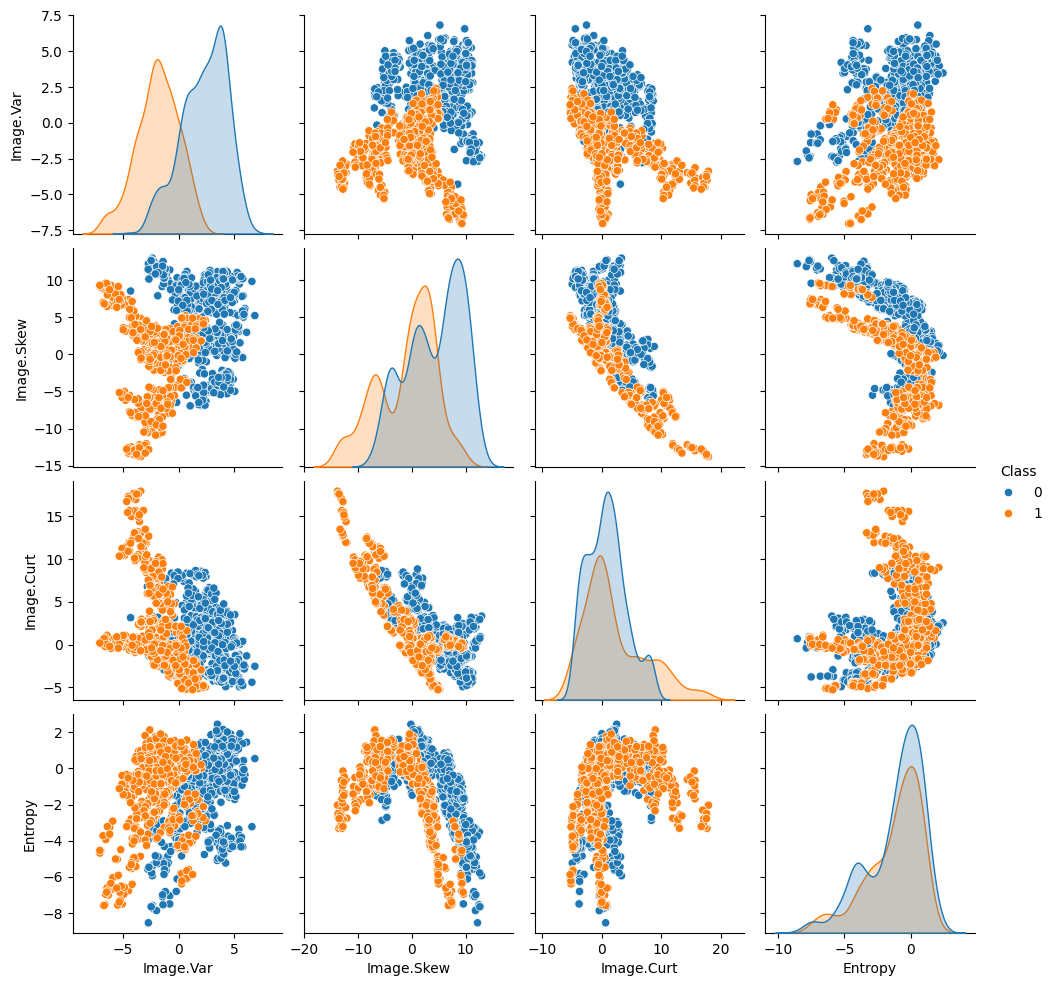

In [ ]:
sns.pairplot(data,hue='Class')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(data.drop('Class',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [ ]:
X = df_feat

In [ ]:
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
import tensorflow as tf

In [ ]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Keras model
classifier = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Input layer + first hidden layer
    Dense(20, activation='relu'), # Second hidden layer
    Dense(10, activation='relu'), # Third hidden layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!pip install tensorflow_estimator

In [ ]:
# Train the Keras model
classifier.fit(X_train, y_train, batch_size=20, epochs=500, verbose=0)

In [ ]:
note_predictions_proba = classifier.predict(X_test)
# Convert probabilities to class labels (0 or 1)
note_predictions = (note_predictions_proba > 0.5).astype(int).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
note_predictions[0]

np.int64(0)

In [ ]:

final_preds = note_predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,final_preds))

[[229   0]
 [  0 183]]


In [ ]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_preds = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       229
           1       0.99      1.00      0.99       183

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [ ]:
print(confusion_matrix(y_test,rfc_preds))

[[227   2]
 [  0 183]]
